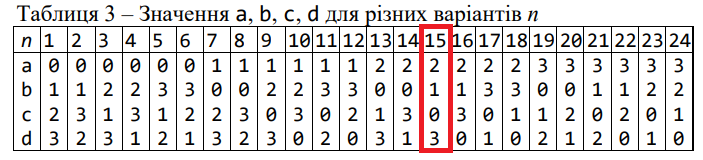

In [64]:
# імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [65]:
# дані:
a, b, c, d = 2, 1, 0, 3
x = np.array([[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4],
              [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4]])
y = a*x[0] + b*x[1] + c + np.random.normal(0, 1+d, 25)
y = (y>y.mean())*1
x=x.T

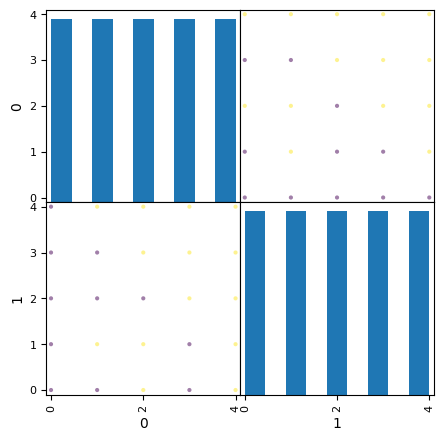

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [66]:
# рисуємо матрицю діаграм розсіювання
df=pd.DataFrame(x, columns=[0,1])
pd.plotting.scatter_matrix(df, c=y, figsize=(5, 5), 
hist_kwds={'bins': 9})
plt.show(); plt.figure()

In [67]:
model=LogisticRegression(C=100) # лінійний класифікатор
model.fit(x,y) # навчаємо модель

LogisticRegression(C=100)

In [68]:
b=model.intercept_ # вільний член
a=model.coef_ # коефіцієнти
print(a, b)

[[1.38864073 0.59844577]] [-3.52213774]


In [73]:
# способи прогнозу в точці p
p=np.array([[2,1]]) 
print(model.predict(p))
print(a[0,0]*p[0,0]+a[0,1]*p[0,1]+b > 0)
print(model.decision_function(p) > 0)

[0]
[False]
[False]


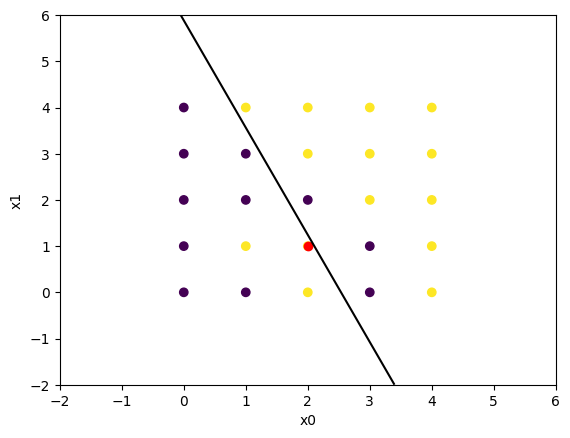

In [74]:
plt.scatter(x[:,0], x[:,1], c=y) # візуалізація класів
plt.scatter(p[:,0], p[:,1], color="r") # візуалізація точки p
# рисуємо границю прийняття рішень
x1, x2 = np.meshgrid(np.linspace(-2, 6), np.linspace(-2, 6))
xx = np.c_[x1.ravel(), x2.ravel()]
d,l = model.decision_function(xx), [0]
#d,l = model.predict_proba(xx)[:, 1], [0.5] # або
plt.contour(x1, x2, d.reshape(x1.shape) ,levels=l, 
colors="black")
plt.xlabel('x0'), plt.ylabel('x1')
plt.show()